In [4]:
# REQUIRED PACKAGES
import ROOT
from ROOT import RDataFrame
import numpy as np

# IMPORTING ADDITIONAL PACKAGES
from ipywidgets import interact, widgets
import dunestyle.root as dunestyle

Welcome to JupyROOT 6.22/08
DUNE plot style enabled


In [5]:
# READING FILE TREES
file = ROOT.TFile.Open('../../nearlinetest/Iterations/ntuple_cal.root')
#while file.IsOpen():
key_list = file.GetListOfKeys()
trees = []
for key in key_list:
    # Get the object associated with the key
    obj = key.ReadObj()
    # Check if the object is a TTree
    if isinstance(obj, ROOT.TTree):
        # Append the name of the tree to the array
        trees.append(obj.GetName())
#    file.Close()

trees.insert(0, 'Select Tree')
drop_down_trees = widgets.Dropdown(options=trees,
                                description='🌴 Tree:',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_trees)

Dropdown(description='🌴 Tree:', layout=Layout(width='max-content'), options=('Select Tree', 'header', 'gates',…

In [6]:
tree = file.Get(drop_down_trees.value)
#tree.Show(5)

In [ ]:
tree.Print()

In [7]:
# EXTRACTING DATA FROM SELECTED TREE
#while file.IsOpen():
list = tree.GetListOfBranches()
branches = []
for item in list:
    # Get the name of the branch
    branch_name = item.GetName()
    # Append the name to the array
    branches.append(branch_name)
#    file.Close()

branches.insert(0, 'Select Branch')
drop_down_branches = widgets.Dropdown(options=branches,
                            description='🍂 Branch:',
                            disabled=False,
                            layout={'width': 'max-content'})
display(drop_down_branches)

Dropdown(description='🍂 Branch:', layout=Layout(width='max-content'), options=('Select Branch', 'ev_run', 'ev_…

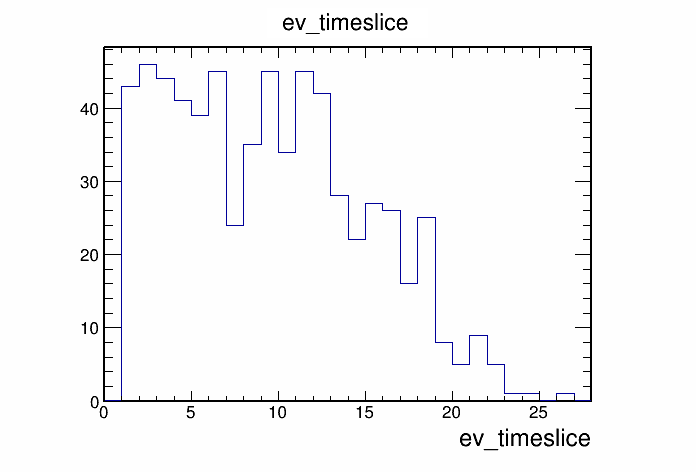

In [8]:
# PLOTTING HISTOGRAM
canvas = ROOT.TCanvas("canvas", "Plot")

tree.Draw(drop_down_branches.value)
canvas.Draw()
